nginx 负载均衡类型，轮询； 高可用

Django 中间件，
Django ORM 搜索
Django 跨站点攻击预防原理

redis 崩溃，缓存，协程；非字符串怎么存储
进程管理，mysql 分表，分库；
Vue

Nginx是一个高性能的Http和反向代理服务器，也是一个IMAP/POP3/SMTP服务器（电子邮件代理）

* Nginx主要功能

    + 处理静态文件，索引文件以及自动索引
    + 反向代理加速(无缓存)，简单的负载均衡和容错 
    + 基于IP 和名称的虚拟主机服务
    + 模块化的结构。同一个 proxy的多个子请求并发处理
    + IMAP/POP3/SMTP代理服务
    + 基于客户端 IP 地址和 HTTP 基本认证的访问控制
    + 支持 FLV （Flash 视频）

* Nginx 负载均衡模型
+ 轮询
    最基本的配置方法，上它是upstream模块默认的负载均衡默认策略。
    每个请求会按时间顺序逐一分配到不同的后端服务器。
+ weight: 权重方式，在轮询策略的基础上指定轮询的几率。
    权重越高分配到需要处理的请求越多。
    此策略比较适合服务器的硬件配置差别比较大的情况。
    此策略可以与least_conn和ip_hash结合使用。
+ ip_hash 指定负载均衡器按照基于客户端IP的分配方式，这个方法确保了相同的客户端的请求一直发送到相同的服务器，以保证session会话。
    这样每个访客都固定访问一个后端服务器，可以解决session不能跨服务器的问题。
    在nginx版本1.3.1之前，不能在ip_hash中使用权重（weight）
    ip_hash不能与backup同时使用。
    此策略适合有状态服务，比如session。
    当有服务器需要剔除，必须手动down掉。
+ least_conn: 把请求转发给连接数较少的后端服务器。
bbbb轮询算法是把请求平均的转发给各个后端，使它们的负载大致相同；但是，有些请求占用的时间很长，会导致其所在的后端负载较高。这种情况下，least_conn这种方式就可以达到更好的负载均衡效果。
    此负载均衡策略适合请求处理时间长短不一造成服务器过载的情况。
+ 第三方策略（第三方插件）
    - fair：按照服务器端的响应时间来分配请求，响应时间短的优先分配。
    - url_hash：按访问url的hash结果来分配请求，使每个url定向到同一个后端服务器，要配合缓存命中来使用。
        同一个资源多次请求，可能会到达不同的服务器上，导致不必要的多次下载，缓存命中率不高，以及一些资源时间的浪费。而使用url_hash，可以使得同一个url（也就是同一个资源请求）会到达同一台服务器，一旦缓存住了资源，再此收到请求，就可以从缓存中读取。　


## Restful 框架

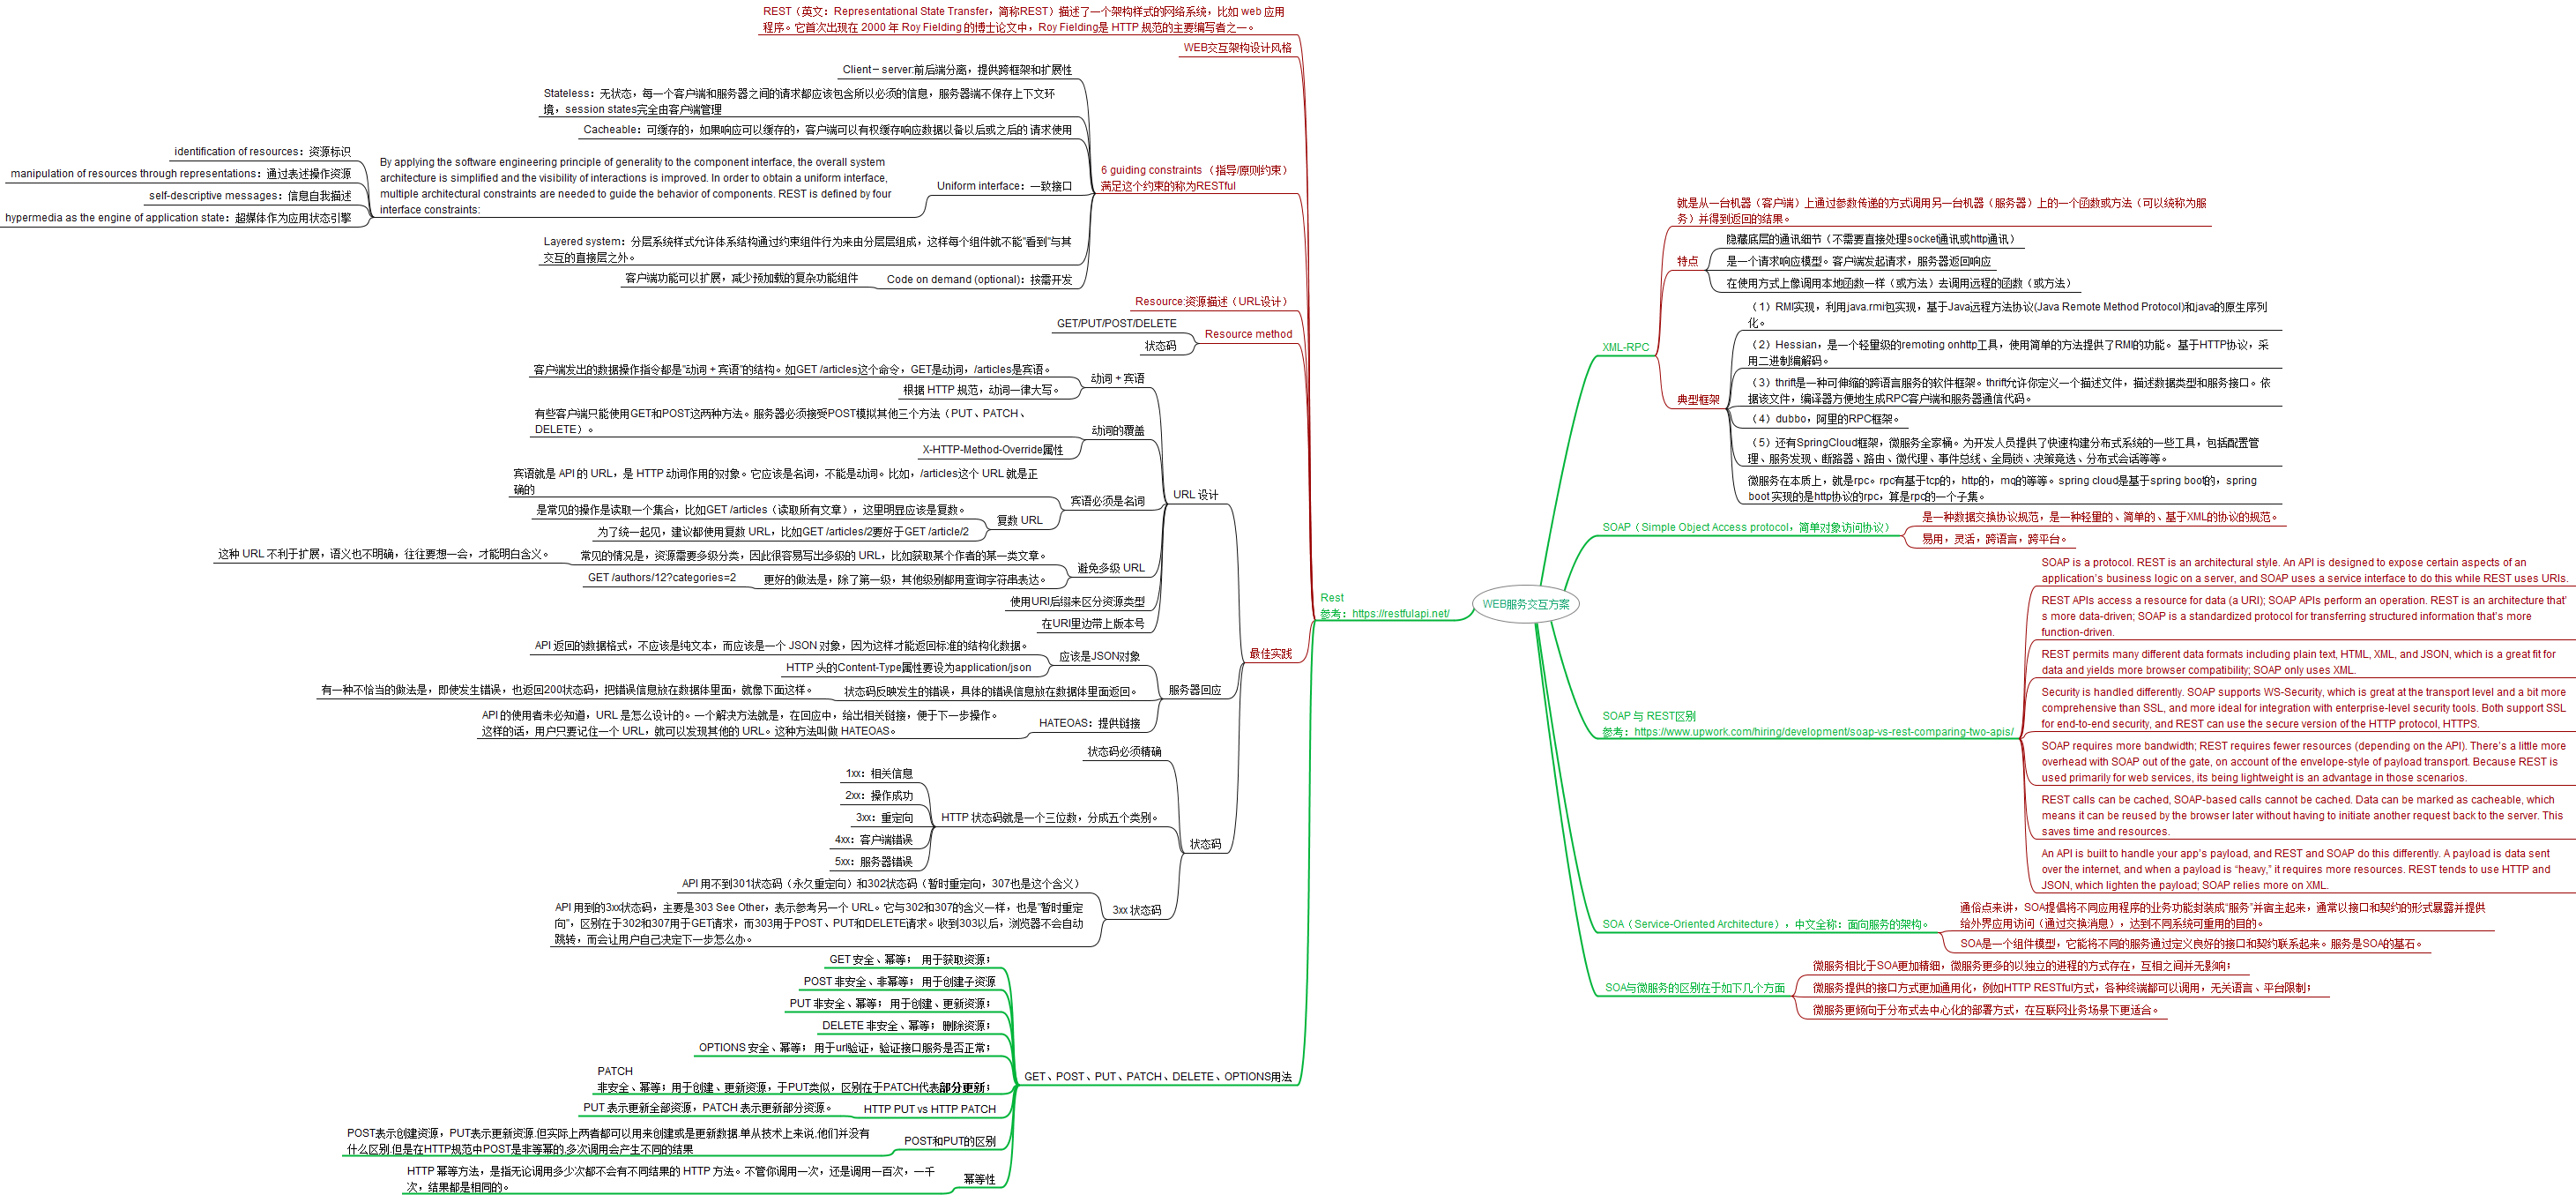


## wsgi


## django请求的生命周期
* 当用户在浏览器中输入url时,浏览器会生成请求头和请求体发给服务端
* 请求头和请求体中会包含浏览器的动作(action),这个动作通常为get或者post,体现在url之中.
* url经过Django中的wsgi,再经过Django的中间件,最后url到过路由映射表,在路由中一条一条进行匹配,一旦其中一条匹配成功就执行对应的视图函数,后面的路由就不再继续匹配了.
* 视图函数根据客户端的请求查询相应的数据.返回给Django,然后Django把客户端想要的数据做为一个字符串返回给客户端.
* 客户端浏览器接收到返回的数据,经过渲染后显示给用户.

## 列举django的内置组件

.Admin是对model中对应的数据表进行增删改查提供的组件
.model组件：负责操作数据库
.form组件：1.生成HTML代码2.数据有效性校验3校验信息返回并展示
.ModelForm组件即用于数据库操作,也可用于用户请求的验证



## 列举django中间件的5个方法？以及django中间件的应用场景

    .process_request : 请求进来时,权限认证
    .process_view : 路由匹配之后,能够得到视图函数
    .process_exception : 异常时执行
    .process_template_responseprocess : 模板渲染时执行
    .process_response : 请求有响应时执行


## 简述什么是FBV和CBV
FBV和CBV本质是一样的，基于函数的视图叫做FBV，基于类的视图叫做CBV
在python中使用CBV的优点：
- .提高了代码的复用性，可以使用面向对象的技术，比如Mixin（多继承）
- .可以用不同的函数针对不同的HTTP方法处理，而不是通过很多if判断，提高代码可读性

## django的request对象是在什么时候创建的？

class WSGIHandler(base.BaseHandler):
-------request = self.request_class(environ)
请求走到WSGIHandler类的时候，执行cell方法，将environ封装成了request

In [ ]:
# 给CBV的程序添加装饰器

from django.utils.decorators import method_decorator
# 1、给方法加：
@method_decorator(check_login)
def post(self, request):
    ...
# 2、给dispatch加：
@method_decorator(check_login)
def dispatch(self, request, *args, **kwargs):
    ...
# 3、给类加：
@method_decorator(check_login, name="get")
@method_decorator(check_login, name="post")
class HomeView(View):
    

In [ ]:
列举django orm 中所有的方法（QuerySet对象的所有方法）
 <1> all():                  查询所有结果 
  <2> filter(**kwargs):       它包含了与所给筛选条件相匹配的对象。获取不到返回None
  <3> get(**kwargs):          返回与所给筛选条件相匹配的对象，返回结果有且只有一个。
                              如果符合筛选条件的对象超过一个或者没有都会抛出错误。
  <4> exclude(**kwargs):      它包含了与所给筛选条件不匹配的对象
  <5> order_by(*field):       对查询结果排序
  <6> reverse():              对查询结果反向排序 
  <8> count():                返回数据库中匹配查询(QuerySet)的对象数量。 
  <9> first():                返回第一条记录 
  <10> last():                返回最后一条记录 
  <11> exists():              如果QuerySet包含数据，就返回True，否则返回False
  <12> values(*field):        返回一个ValueQuerySet——一个特殊的QuerySet，运行后得到的
                              并不是一系 model的实例化对象，而是一个可迭代的字典序列
  <13> values_list(*field):   它与values()非常相似，它返回的是一个元组序列，values返回的是一个字典序列
  <14> distinct():            从返回结果中剔除重复纪录


## select_related和prefetch_related的区别？

前提：有外键存在时，可以很好的减少数据库请求的次数,提高性能
select_related通过多表join关联查询,一次性获得所有数据,只执行一次SQL查询
prefetch_related分别查询每个表,然后根据它们之间的关系进行处理,执行两次查询

In [ ]:
filter和exclude的区别？

两者取到的值都是QuerySet对象,filter选择满足条件的,exclude:排除满足条件的.

In [ ]:
列举django orm中三种能写sql语句的方法

1.使用execute执行自定义的SQL
     直接执行SQL语句（类似于pymysql的用法）
        # 更高灵活度的方式执行原生SQL语句
        from django.db import connection
        cursor = connection.cursor()
        cursor.execute("SELECT DATE_FORMAT(create_time, '%Y-%m') FROM blog_article;")
        ret = cursor.fetchall()
        print(ret)
2.使用extra方法 ：queryset.extra(select={"key": "原生的SQL语句"})
3.使用raw方法
    1.执行原始sql并返回模型
    2.依赖model多用于查询


In [ ]:
values和values_list的区别？

    values : queryset类型的列表中是字典
    values_list : queryset类型的列表中是元组


In [ ]:
cookie和session的区别：

    .cookie:
    cookie是保存在浏览器端的键值对,可以用来做用户认证
    .session：
    将用户的会话信息保存在服务端,key值是随机产生的字符串,value值是session的内容
    依赖于cookie将每个用户的随机字符串保存到用户浏览器上
    Django中session默认保存在数据库中：django_session表
    flask,session默认将加密的数据写在用户的cookie中


In [ ]:
如何使用django orm批量创建数据？

objs=[models.Book(title="图书{}".format(i+15)) for i in range(100)]
models.Book.objects.bulk_create(objs)

In [ ]:
django的Form组件中,如果字段中包含choices参数，请使用两种方式实现数据源实时更新

    1.重写构造函数

def__init__(self, *args, **kwargs):
     super().__init__(*args, **kwargs)
     self.fields["city"].widget.choices = models.City.objects.all().values_list("id", "name")

    2.利用ModelChoiceField字段,参数为queryset对象
    authors = form_model.ModelMultipleChoiceField(queryset=models.NNewType.objects.all())//多选


In [ ]:
jango的Model中的ForeignKey字段中的on_delete参数有什么作用？

    删除关联表中的数据时,当前表与其关联的field的操作
    django2.0之后，表与表之间关联的时候,必须要写on_delete参数,否则会报异常


In [ ]:
django的模板中自定义filter和simple_tag的区别？

    自定义filter：{{ 参数1|filter函数名:参数2 }}
    1.可以与if标签来连用
    2.自定义时需要写两个形参

    例子：自定义filter
            1. 在app01下创建一个叫templatetags的Python包
            2. 在templatetags的文件夹下创建py文件  myfilters
            3. 在py文件中写代码
                from django import template
                register = template.Library()
                
                @register.filter
                def add_sb(value,arg='aaa'):
                    return "{}_sb_{}".formart(value,arg)
                    
                @register.filter(name='sb')
                def add_sb(value,arg='aaa'):
                    return "{}_sb_{}".formart(value,arg)     
            4. 使用自定义filter
                {% load myfilters %}
                {{ name|add_sb:'xxx'}}
                {{ name|sb:'xxx'}}

    simple_tag:{% simple_tag函数名 参数1 参数2 %}
    1.可以传多个参数,没有限制
    2.不能与if标签来连用

例子：自定义simpletag
    创建
        1 、在app01中创建一个名字是templatetags的包，
        2、在包中创建一个py文件
        3、在py文件中导入
              from django import template
              register = template.Library()
        4、写函数
              @register.simple_tag(name="plus")
              def plus(a,b,c):
                  return '{}+{}+{}'.format(a,b,c)
        5、加装饰器@register.simple_tag(name="plus")
  使用
      1、导入
            {% load mytag %}
      2、使用
           {% plus 1 2 3 %}

In [ ]:
django中csrf的实现机制

    第一步：django第一次响应来自某个客户端的请求时,后端随机产生一个token值，把这个token保存在SESSION状态中;同时,后端把这个token放到cookie中交给前端页面；
    第二步：下次前端需要发起请求（比如发帖）的时候把这个token值加入到请求数据或者头信息中,一起传给后端；Cookies:{csrftoken:xxxxx}
    第三步：后端校验前端请求带过来的token和SESSION里的token是否一致。


In [ ]:
基于django使用ajax发送post请求时，都可以使用哪种方法携带csrf token？

    1.后端将csrftoken传到前端，发送post请求时携带这个值发送

data: {
        csrfmiddlewaretoken: '{{ csrf_token }}'
  },

    2.获取form中隐藏标签的csrftoken值，加入到请求数据中传给后端

data: {
          csrfmiddlewaretoken:$('[name="csrfmiddlewaretoken"]').val()
     },
    

In [ ]:
Django本身提供了runserver，为什么不能用来部署？(runserver与uWSGI的区别)

    1.runserver方法是调试 Django 时经常用到的运行方式，它使用Django自带的
    WSGI Server 运行，主要在测试和开发中使用，并且 runserver 开启的方式也是单进程 。
    2.uWSGI是一个Web服务器，它实现了WSGI协议、uwsgi、http 等协议。注意uwsgi是一种通信协议，而uWSGI是实现uwsgi协议和WSGI协议的 Web 服务器。uWSGI具有超快的性能、低内存占用和多app管理等优点，并且搭配着Nginx就是一个生产环境了，能够将用户访问请求与应用 app 隔离开，实现真正的部署 。相比来讲，支持的并发量更高，方便管理多进程，发挥多核的优势，提升性能。


In [ ]:
Django如何实现websocket？

    django实现websocket官方推荐大家使用channels。channels通过升级http协议 升级到websocket协议。保证实时通讯。也就是说，我们完全可以用channels实现我们的即时通讯。而不是使用长轮询和计时器方式来保证伪实时通讯。他通过改造django框架，使django既支持http协议又支持websocket协议。
    官方文档地址：https://channels.readthedocs.io/en/stable/
